In [1]:
print('Meu nome é: Gabriel Moraes Barros ')
print('Meu RA é: 192801')

Meu nome é: Gabriel Moraes Barros 
Meu RA é: 192801


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris

In [3]:
import keras
from keras.utils import np_utils 

Using TensorFlow backend.


In [4]:
import torch
from torch.autograd import Variable
import torch.optim as optim

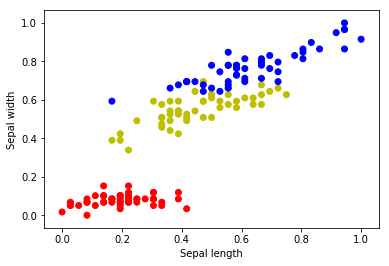

In [5]:
iris = load_iris()
X = iris.data[:,::2]  # comprimento das sépalas e pétalas, indices 0 e 2
Xc = X - X.min(axis=0)
Xc /= Xc.max(axis=0)

Y = iris.target

#X[:,0] = Sepal lenght
#X[:,1] = Sepal width
#define  colors to be red, yellow and blue
colors = np.array(['r','y','b'])
plt.scatter(Xc[:, 0], Xc[:, 1], c=colors[Y])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [6]:
print(X.shape)
print(Y.shape)

(150, 2)
(150,)


In [7]:
Y_oh = np_utils.to_categorical(Y, 3) 
print(Y[0:5])
print(Y_oh[0:5])

[0 0 0 0 0]
[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]]


In [8]:
print(X.shape[0])

150


## Modelo do Torch


In [9]:
n_classes=3
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 10, X.shape[1], 10, n_classes 

In [24]:
model_torch = torch.nn.Sequential(
    torch.nn.Linear(X.shape[1], 2*H),
    torch.nn.ReLU(),
    
    torch.nn.Linear(2*H, H),
    torch.nn.ReLU(),

    torch.nn.Linear(H, n_classes),
    torch.nn.Softmax()
)

In [25]:
criterion = torch.nn.CrossEntropyLoss()
learning_rate = 1e-2
optimizer = torch.optim.Adam(model_torch.parameters(), lr=learning_rate)

opt = optim.SGD(model_torch.parameters(), lr=0.2)

In [26]:
#X_tensor = torch.from_numpy(Xc).type(torch.FloatTensor)
X_tensor = Variable(torch.from_numpy(Xc).type(torch.FloatTensor))

print(X_tensor.size())
#Y_tensor = torch.from_numpy(Y).type(torch.LongTensor)
Y_tensor = Variable(torch.from_numpy(Y).type(torch.LongTensor), requires_grad=False)
print(Y_tensor.size())

torch.Size([150, 2])
torch.Size([150])


In [27]:
for t in range(700):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model_torch(X_tensor)

    # Compute and print loss
    loss = criterion(y_pred, Y_tensor)
    print('Iteration , Loss',t, loss.data[0])

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Iteration , Loss 0 1.1034729480743408
Iteration , Loss 1 1.1014769077301025
Iteration , Loss 2 1.0998504161834717
Iteration , Loss 3 1.0984543561935425
Iteration , Loss 4 1.0972102880477905
Iteration , Loss 5 1.0963257551193237
Iteration , Loss 6 1.0956257581710815
Iteration , Loss 7 1.0948216915130615
Iteration , Loss 8 1.0938688516616821
Iteration , Loss 9 1.0927573442459106
Iteration , Loss 10 1.091389536857605
Iteration , Loss 11 1.0895615816116333
Iteration , Loss 12 1.0873868465423584
Iteration , Loss 13 1.0849816799163818
Iteration , Loss 14 1.0822240114212036
Iteration , Loss 15 1.0791062116622925
Iteration , Loss 16 1.075727939605713
Iteration , Loss 17 1.0721665620803833
Iteration , Loss 18 1.0682121515274048
Iteration , Loss 19 1.0638071298599243
Iteration , Loss 20 1.0588854551315308
Iteration , Loss 21 1.053410291671753
Iteration , Loss 22 1.04734206199646
Iteration , Loss 23 1.0407015085220337
Iteration , Loss 24 1.0334968566894531
Iteration , Loss 25 1.0256868600845337
I

Iteration , Loss 244 0.5847553610801697
Iteration , Loss 245 0.5847131609916687
Iteration , Loss 246 0.5846713185310364
Iteration , Loss 247 0.5846301317214966
Iteration , Loss 248 0.5845891237258911
Iteration , Loss 249 0.5845488905906677
Iteration , Loss 250 0.5845093131065369
Iteration , Loss 251 0.5844700336456299
Iteration , Loss 252 0.5844310522079468
Iteration , Loss 253 0.5843926072120667
Iteration , Loss 254 0.5843550562858582
Iteration , Loss 255 0.584317684173584
Iteration , Loss 256 0.584280788898468
Iteration , Loss 257 0.584244430065155
Iteration , Loss 258 0.5842084884643555
Iteration , Loss 259 0.5841727256774902
Iteration , Loss 260 0.584137499332428
Iteration , Loss 261 0.5841028690338135
Iteration , Loss 262 0.5840684175491333
Iteration , Loss 263 0.5840345025062561
Iteration , Loss 264 0.5840007662773132
Iteration , Loss 265 0.5839678645133972
Iteration , Loss 266 0.5839349031448364
Iteration , Loss 267 0.5839027166366577
Iteration , Loss 268 0.5838707089424133
Iter

Iteration , Loss 459 0.5811777710914612
Iteration , Loss 460 0.5811723470687866
Iteration , Loss 461 0.5811667442321777
Iteration , Loss 462 0.5811613202095032
Iteration , Loss 463 0.5811557769775391
Iteration , Loss 464 0.5811504125595093
Iteration , Loss 465 0.5811450481414795
Iteration , Loss 466 0.5811396241188049
Iteration , Loss 467 0.5811344385147095
Iteration , Loss 468 0.5811290740966797
Iteration , Loss 469 0.5811238288879395
Iteration , Loss 470 0.581118643283844
Iteration , Loss 471 0.5811135172843933
Iteration , Loss 472 0.5811084508895874
Iteration , Loss 473 0.5811033844947815
Iteration , Loss 474 0.5810982584953308
Iteration , Loss 475 0.5810933709144592
Iteration , Loss 476 0.5810884237289429
Iteration , Loss 477 0.5810832977294922
Iteration , Loss 478 0.5810786485671997
Iteration , Loss 479 0.5810734629631042
Iteration , Loss 480 0.5810686945915222
Iteration , Loss 481 0.581063985824585
Iteration , Loss 482 0.5810592174530029
Iteration , Loss 483 0.5810545086860657
It

Iteration , Loss 678 0.5805200934410095
Iteration , Loss 679 0.5805186629295349
Iteration , Loss 680 0.5805171132087708
Iteration , Loss 681 0.5805156230926514
Iteration , Loss 682 0.5805139541625977
Iteration , Loss 683 0.5805124640464783
Iteration , Loss 684 0.5805111527442932
Iteration , Loss 685 0.580509603023529
Iteration , Loss 686 0.5805081129074097
Iteration , Loss 687 0.5805066227912903
Iteration , Loss 688 0.5805051922798157
Iteration , Loss 689 0.5805038213729858
Iteration , Loss 690 0.5805020928382874
Iteration , Loss 691 0.5805006623268127
Iteration , Loss 692 0.5804992318153381
Iteration , Loss 693 0.5804978609085083
Iteration , Loss 694 0.5804963707923889
Iteration , Loss 695 0.5804949998855591
Iteration , Loss 696 0.580493688583374
Iteration , Loss 697 0.5804920196533203
Iteration , Loss 698 0.5804906487464905
Iteration , Loss 699 0.580489456653595


In [28]:
loss = criterion(model_torch(X_tensor), Y_tensor)
print('Final loss:',loss)

for i in model_torch.parameters():
    print(i.data.shape)

    

Final loss: Variable containing:
 0.5805
[torch.FloatTensor of size 1]

torch.Size([20, 2])
torch.Size([20])
torch.Size([10, 20])
torch.Size([10])
torch.Size([3, 10])
torch.Size([3])


In [29]:
y_pred_max = np.argmax(model_torch(X_tensor).data.numpy(),axis=1)
acc = np.sum(y_pred_max == Y)/y_pred_max.shape[0]
print('Accuracy = %.3f' % acc,'%')

Accuracy = 0.967 %


In [17]:
print('Matriz de confusão:')
import pandas as pd
pd.crosstab(y_pred_max, Y)

Matriz de confusão:


col_0,0,1,2
row_0,,,
0,50,0,0
1,0,47,1
2,0,3,49
